In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import math
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'iframe' # or 'colab' or 'iframe' or 'iframe_connected' or 'sphinx_gallery'
from math import log2, radians, cos, sqrt

pd.options.display.max_rows = 4000

if not os.path.exists("images"):
    os.mkdir("images")

In [2]:
data_log = pd.read_csv('entry_log.csv').astype('float64')

data_log['time'] = data_log['time'] - data_log['time'][0]

data_log.head()

data_log.dtypes

,mode,time,alt,speed,eow,mach,hdot,range,lat,long,pitch,roll,tgt_range,range_err,az_err,roll_ref,l_d,Unnamed: 17
0,1.0,0.00,105.941752,7271.198433,2.801478e+06,23.945908,-99.401246,6570.294860,13.893057,-120.068074,37.760545,0.023087,4700.137683,273.211814,-10.635638,3.386226,0.911195,NaN
1,1.0,3.00,105.638110,7271.499642,2.801398e+06,24.041555,-103.074258,6550.056430,13.701728,-120.056326,38.198430,-0.012030,4679.899253,-778.967383,-10.677208,59.266955,0.907885,NaN
2,1.0,6.40,105.280532,7271.851035,2.801301e+06,24.151505,-107.261269,6525.322369,13.483411,-120.042967,38.079240,0.021437,4655.165192,-366.667170,-10.728460,57.430746,0.910547,NaN
3,1.0,9.98,104.888635,7272.240459,2.801198e+06,24.267898,-111.673222,6500.590242,13.253512,-120.028953,37.935166,-0.025556,4630.433065,-129.859977,-10.780197,56.848926,0.911734,NaN
4,1.0,13.62,104.474007,7272.641980,2.801081e+06,24.386487,-116.145906,6475.860004,13.019732,-120.014757,38.024438,0.026747,4605.702827,-41.507171,-10.832422,56.672701,0.911369,NaN


mode           float64
time           float64
alt            float64
speed          float64
eow            float64
mach           float64
hdot           float64
range          float64
lat            float64
long           float64
pitch          float64
roll           float64
tgt_range      float64
range_err      float64
az_err         float64
roll_ref       float64
l_d            float64
Unnamed: 17    float64
dtype: object

In [3]:
data_entry = data_log[data_log['tgt_range'] > 200]
data_taem = data_log[data_log['tgt_range'] <= 200]

In [4]:
def entry_plots(data):
    
    

    
    fig_1, ax_1 = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

    plt_ = ax_1[0]
    plt_.plot(data['time'], data['alt'])

    plt_.set_xlabel('Time')
    plt_.set_ylabel('Altitude (km)')
    plt_.grid()

    plt_ = ax_1[1]
    plt_.plot(data['time'], data['speed'])

    plt_.set_xlabel('Time')
    plt_.set_ylabel('Speed (m/s)')
    plt_.grid()

    fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(18, 15))

    plt_ = ax[0]
    plt_.plot(data['range'], data['alt'])

    plt_.set_xlabel('Range')
    plt_.set_ylabel('Altitude (km)')
    plt_.grid()

    plt_.invert_xaxis()

    plt_ = ax[1]
    plt_.plot(data['range'], data['speed'])

    plt_.set_xlabel('Range')
    plt_.set_ylabel('Speed (m/s)')
    plt_.grid()

    plt_.invert_xaxis()


    plt_ = ax[2]

    plt_.plot(data['range'], data['az_err'])


    plt.ylim((-30,30))    
    plt_.set_xlabel('Range')
    plt_.set_ylabel('Delaz °')
    plt_.grid()

    plt_.invert_xaxis()

    
    fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(18, 15))

    plt_ = ax[0]
    plt_.plot(data['range'], data['alt'])

    plt_.set_xlabel('Range')
    plt_.set_ylabel('Altitude (km)')
    plt_.grid()

    plt_.invert_xaxis()

    plt_ = ax[1]
    plt_.plot(data['range'], data['speed'])

    plt_.set_xlabel('Range')
    plt_.set_ylabel('Speed (m/s)')
    plt_.grid()

    plt_.invert_xaxis()


    plt_ = ax[2]

    plt_.plot(data['range'], data['az_err'])


    plt.ylim((-30,30))    
    plt_.set_xlabel('Range')
    plt_.set_ylabel('Delaz °')
    plt_.grid()

    plt_.invert_xaxis()



    fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))

    plt_ = ax[0]
    plt_.plot(data['speed'], data['pitch'])

    plt.ylim((0,45)) 
    plt_.set_ylabel('Pitch °')
    plt_.grid()


    plt_.invert_xaxis()

    plt_ = ax[1]

    plt_.plot(data['speed'], abs(data['roll_ref']),'--', color='r',label='roll_ref')
    plt_.plot(data['speed'], abs(data['roll']),label='abs_roll')
    plt_.plot(data['speed'], data['roll'], '--', color='k', label='roll')


    plt.ylim((-90,90))    
    plt_.set_ylabel('Roll °')
    plt_.legend()
    plt_.grid()


    plt_.invert_xaxis()

    plt_ = ax[2]
    plt_.plot(data['speed'], data['hdot'])

    plt.ylim((-200,100))    
    plt_.set_xlabel('Speed')
    plt_.set_ylabel('Hdot (m/s)')
    plt_.grid()

    plt_.invert_xaxis()

    
    plt.figure(figsize=(12, 10))


    plt.plot(data['speed'], data['l_d'])

    plt.xlabel('Speed')
    plt.ylabel('L/D')
    plt.grid()




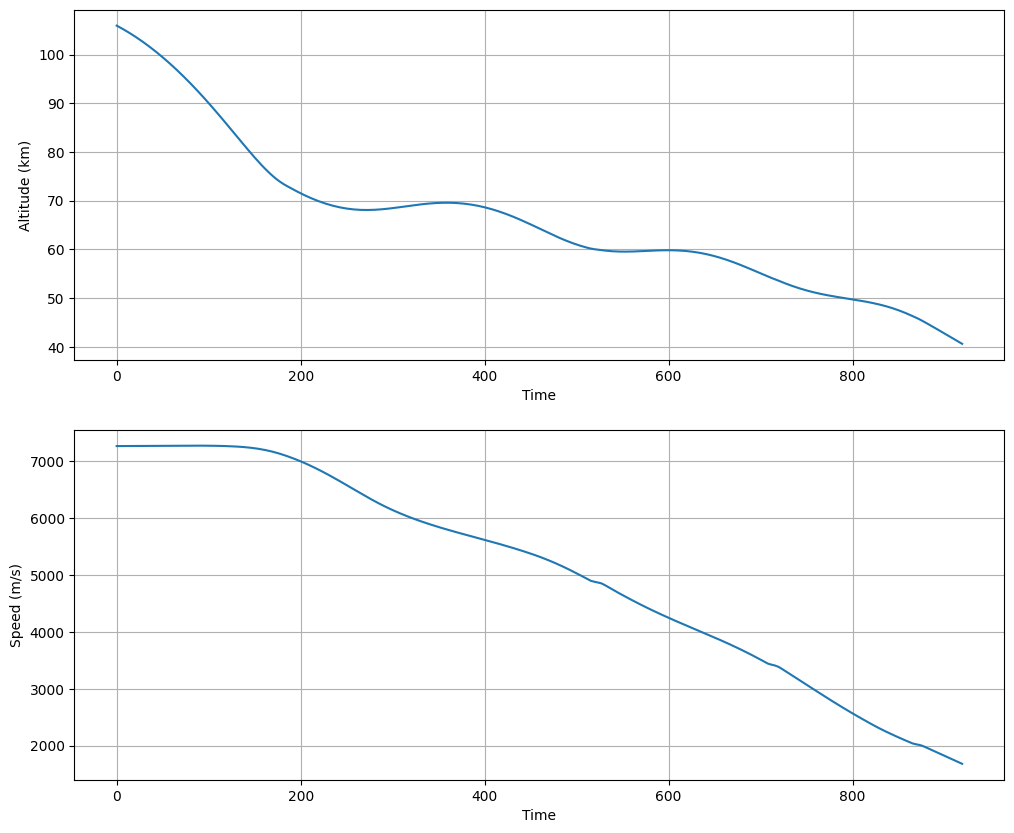

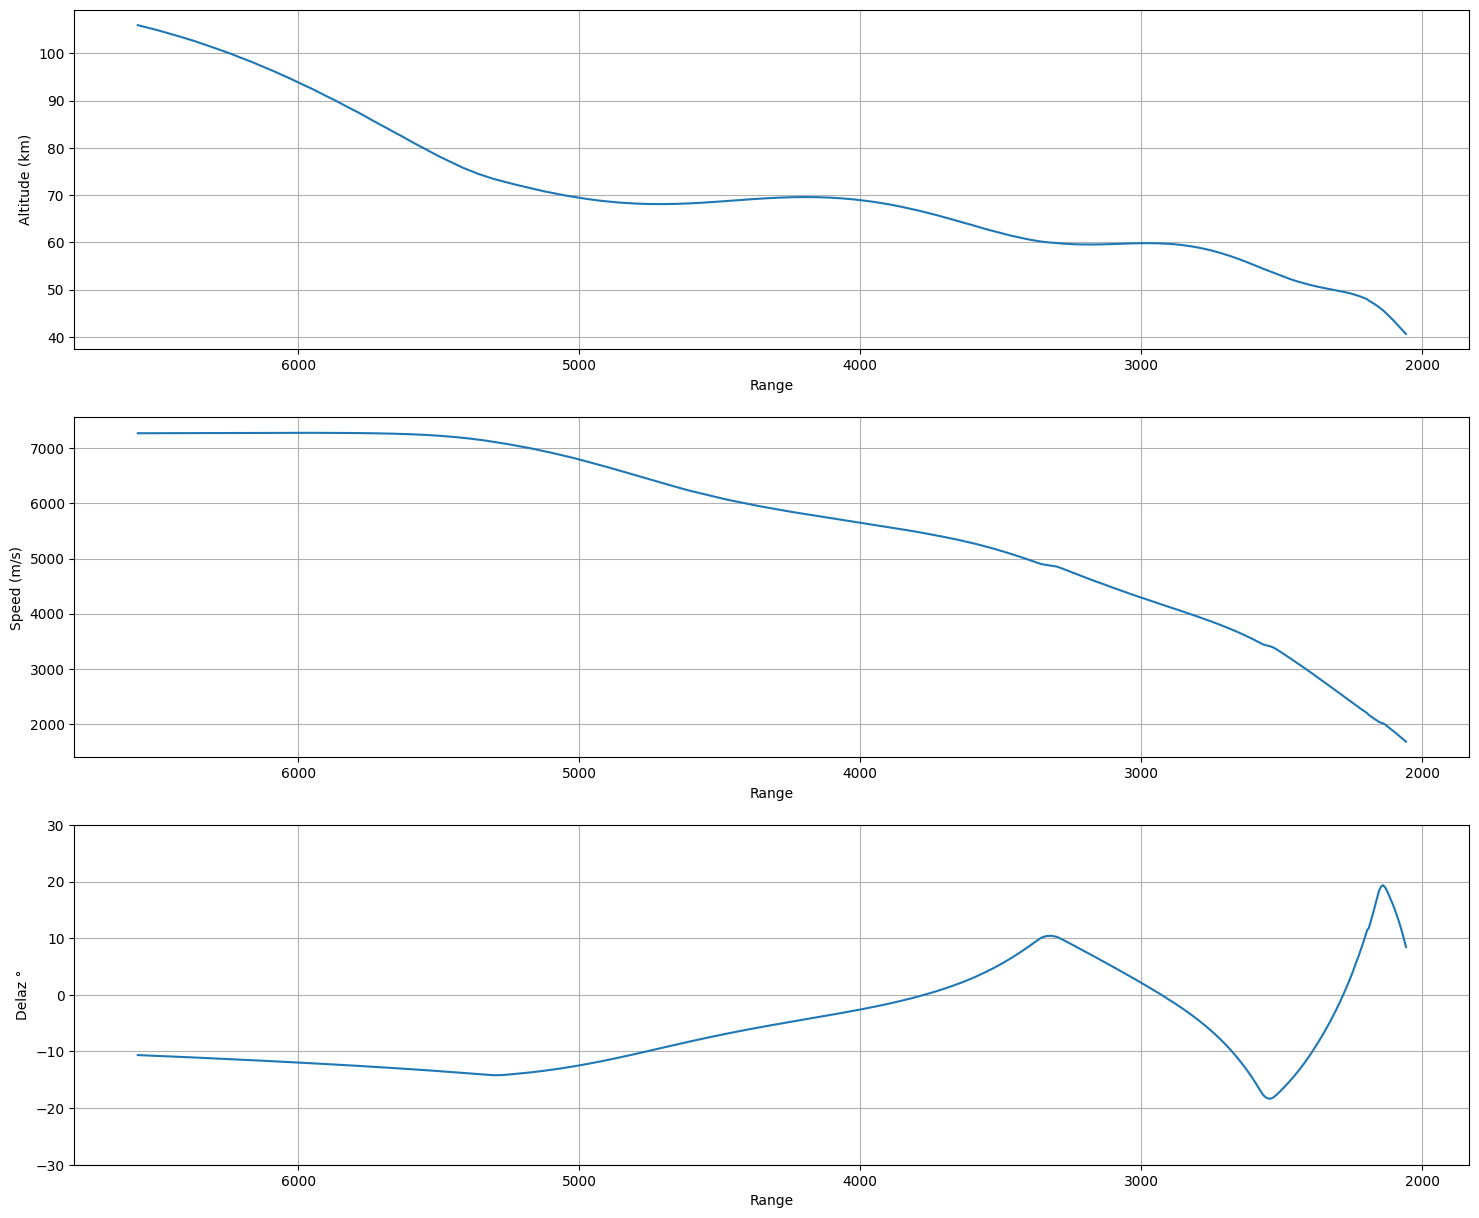

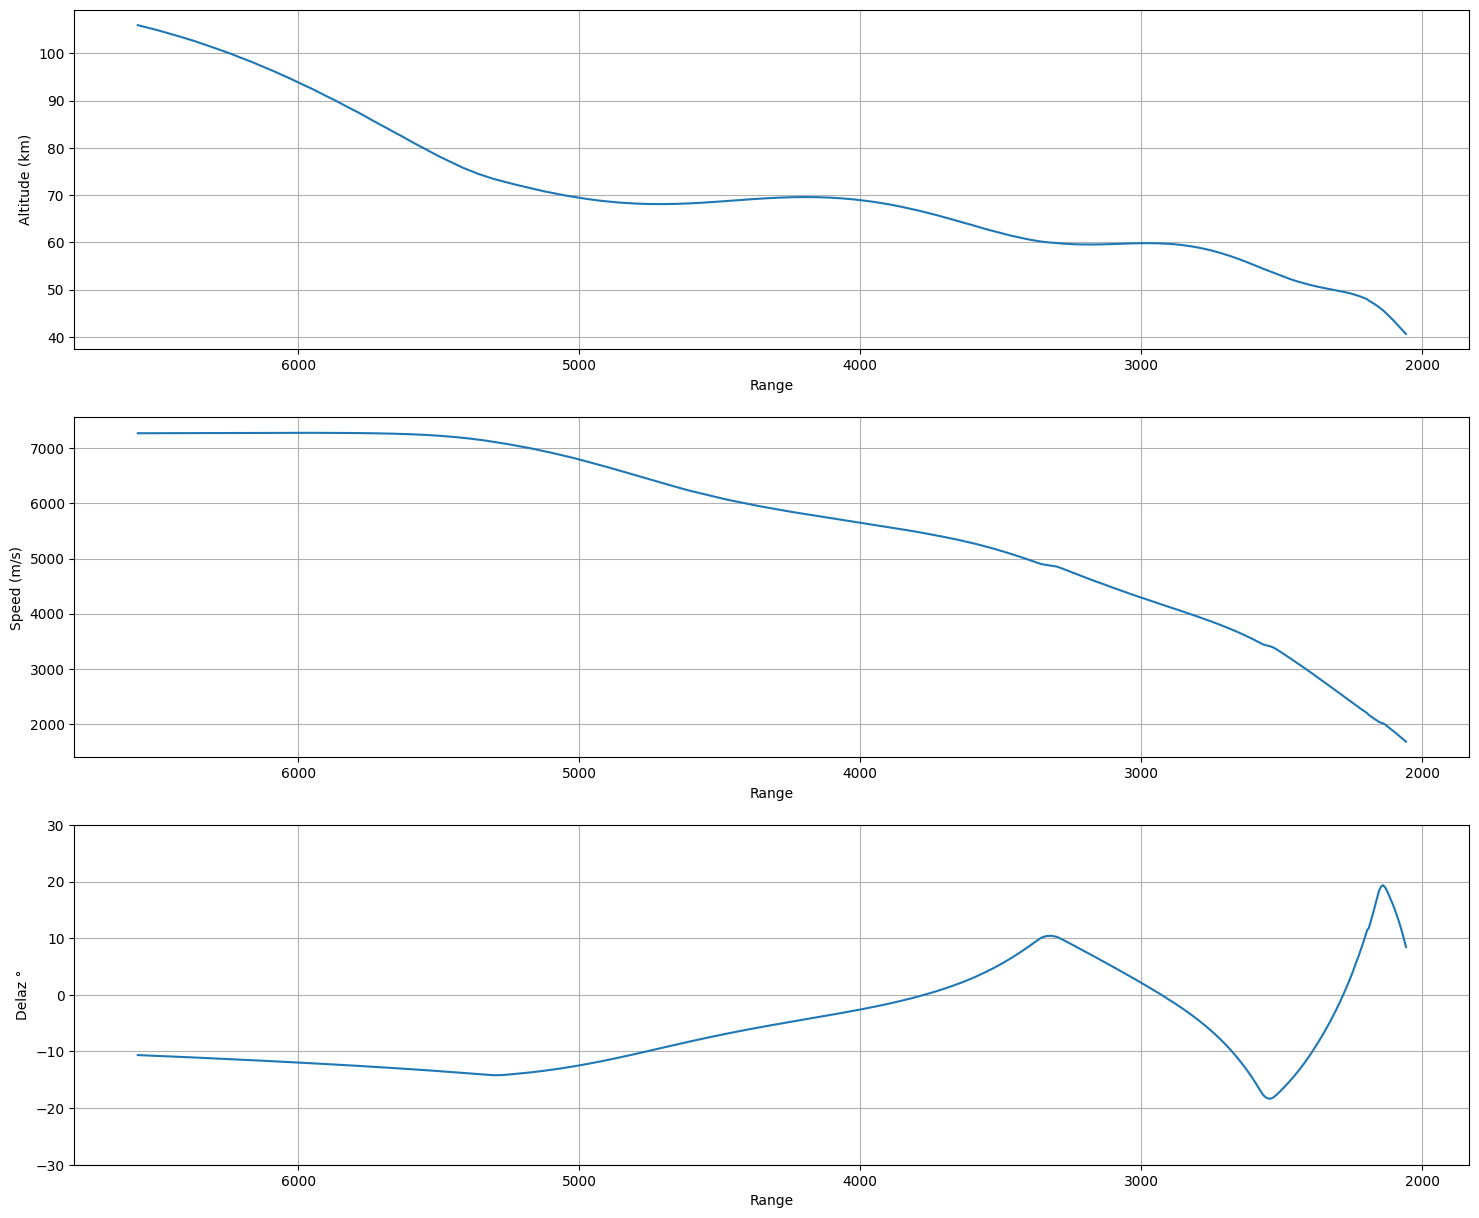

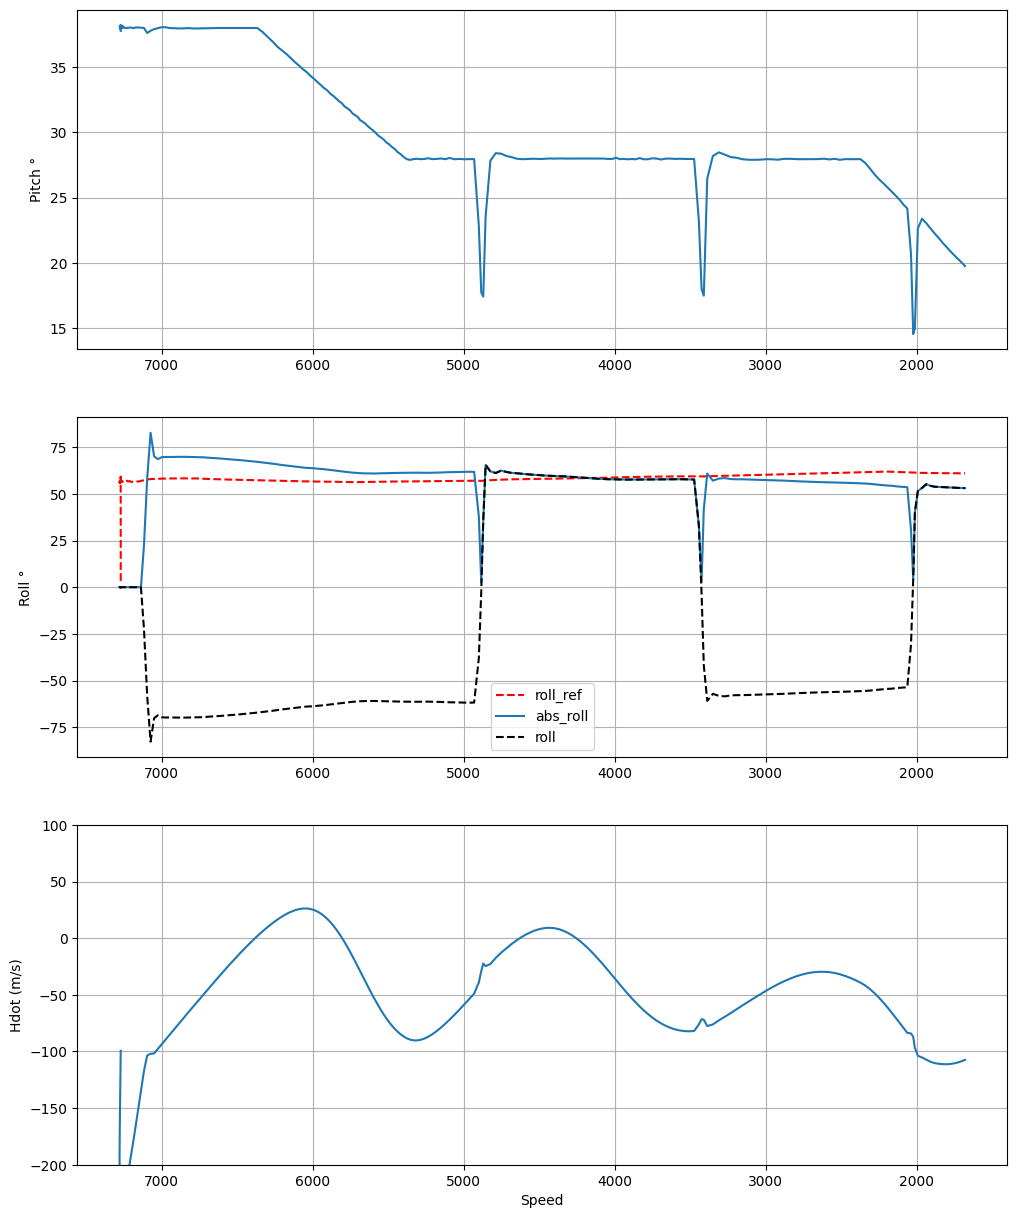

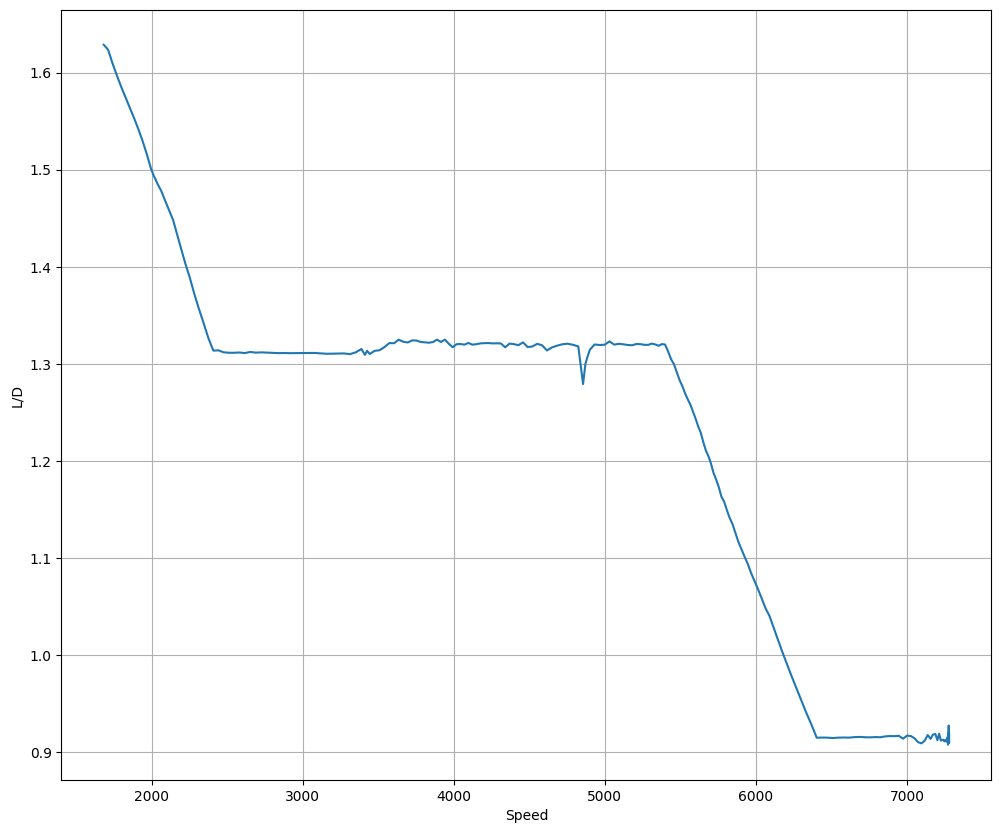

In [5]:
entry_plots(data_entry)

In [6]:

# Create a Scattermapbox trace with colors based on 'alt' column
trace = go.Scattergeo(
    mode='lines+markers',
    lon=data_entry['long'],
    lat=data_entry['lat'],
    line=dict(width=1, color='black'),
    marker=dict(
        size=6,
        color=data_entry['alt'],
        colorscale='Viridis',  # Choose the colorscale you prefer
        cmin=data_entry['alt'].min(),
        cmax=data_entry['alt'].max(),
        colorbar=dict(title='Altitude')
    ),
    hovertemplate='Latitude: %{lat:.4f}<br>Longitude: %{lon:.4f}<br>Altitude: %{text}<br>Delaz: %{customdata}<extra></extra>',
    text=data_entry['alt'],
    customdata=data_entry['az_err']
)

center_lat = (data_entry['lat'].min() + data_entry['lat'].max()) / 2
center_lon = (data_entry['long'].min() + data_entry['long'].max()) / 2


# Create the layout for the 3D globe view
layout = go.Layout(
    title_text='3D Globe View',
    showlegend=False,
    geo=dict(
        showland=True,
        landcolor='rgb(243, 243, 243)',
        countrycolor='rgb(204, 204, 204)',
        showcountries=True,
        showocean=True,
        lonaxis_gridcolor='rgb(102, 102, 102)',
        lataxis_gridcolor='rgb(102, 102, 102)',
        oceancolor='rgb(204, 230, 255)',
        showcoastlines=True,
        coastlinecolor='rgb(204, 204, 204)',
        showframe=True,

        center=dict(lat=center_lat, lon=center_lon),
        projection=dict(type='orthographic', rotation=dict(lon=center_lon, lat=center_lat, roll=0)),

    )
)

# Create the figure and add the trace
fig_traj = go.Figure(data=[trace], layout=layout)

fig_traj.update_layout(
    autosize=False,
    width=800,
    height=800,)

In [7]:
# Create a Scattermapbox trace with colors based on 'alt' column
trace = go.Scattergeo(
    mode='lines+markers',
    lon=data_taem['long'],
    lat=data_taem['lat'],
    line=dict(width=1, color='black'),
    marker=dict(
        size=6,
        color=data_taem['speed'],
        colorscale='Viridis',  # Choose the colorscale you prefer
        cmin=data_taem['speed'].min(),
        cmax=data_taem['speed'].max(),
        colorbar=dict(title='Speed')
    ),
    hovertemplate='Latitude: %{lat:.4f}<br>Longitude: %{lon:.4f}<br>Altitude: %{text}<br>Speed: %{customdata}<extra></extra>',
    text=data_taem['alt'],
    customdata=data_taem['speed']
)

center_lat = (data_taem['lat'].min() + data_taem['lat'].max()) / 2
center_lon = (data_taem['long'].min() + data_taem['long'].max()) / 2


# Create the layout for the 3D globe view
layout = go.Layout(
    title_text='3D Globe View',
    showlegend=False,
    geo=dict(
        showland=True,
        landcolor='rgb(243, 243, 243)',
        countrycolor='rgb(204, 204, 204)',
        showcountries=True,
        showocean=True,
        lonaxis_gridcolor='rgb(102, 102, 102)',
        lataxis_gridcolor='rgb(102, 102, 102)',
        oceancolor='rgb(204, 230, 255)',
        showcoastlines=True,
        coastlinecolor='rgb(204, 204, 204)',
        showframe=True,

        center=dict(lat=center_lat, lon=center_lon),
        projection=dict(type='orthographic', rotation=dict(lon=center_lon, lat=center_lat, roll=0)),

    )
)

# Create the figure and add the trace
fig_traj = go.Figure(data=[trace], layout=layout)

fig_traj.update_layout(
    autosize=False,
    width=800,
    height=800,)


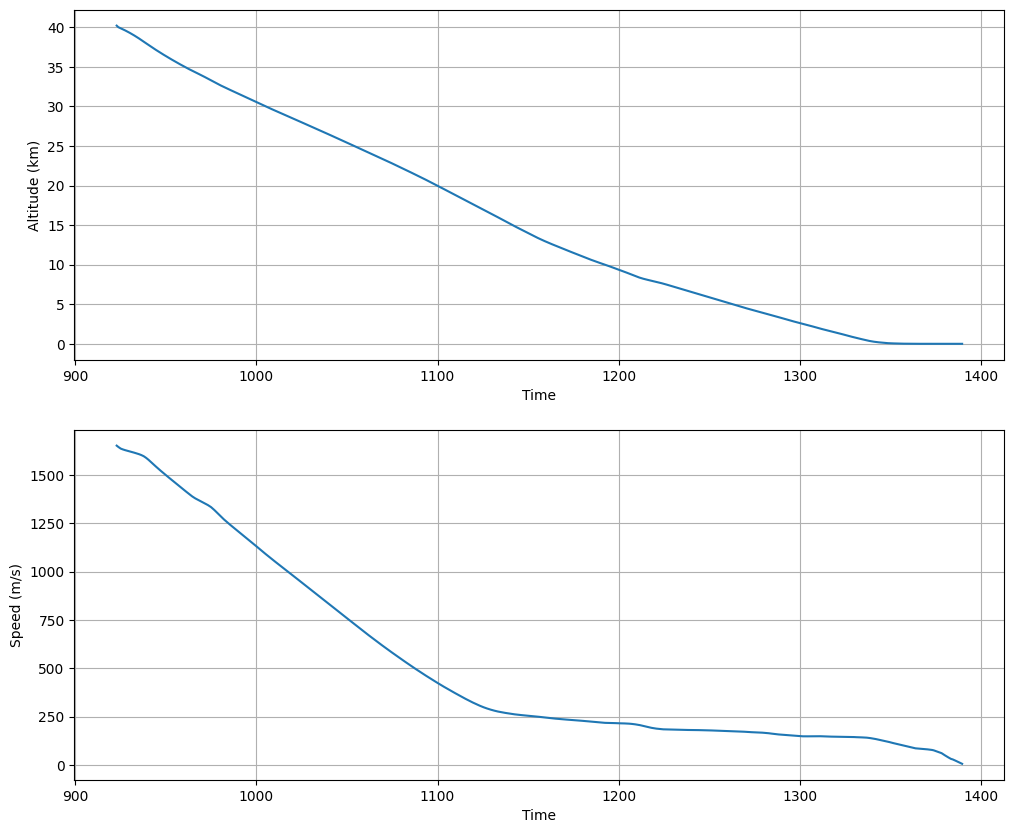

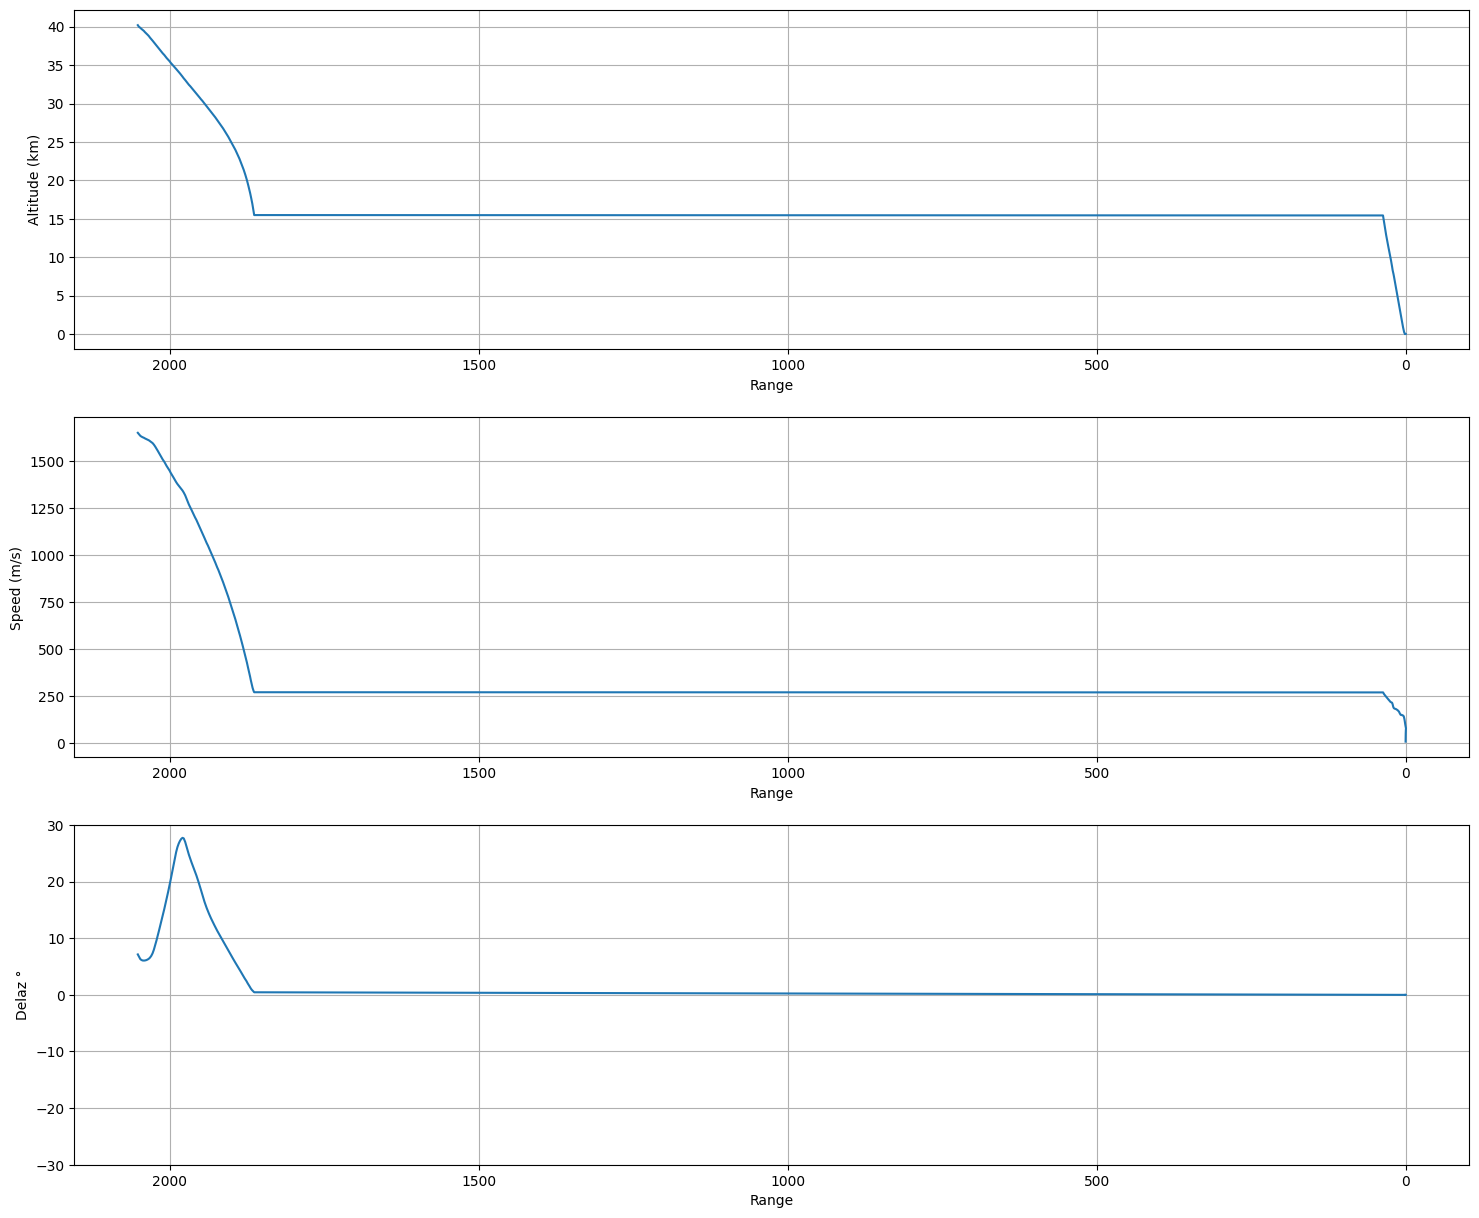

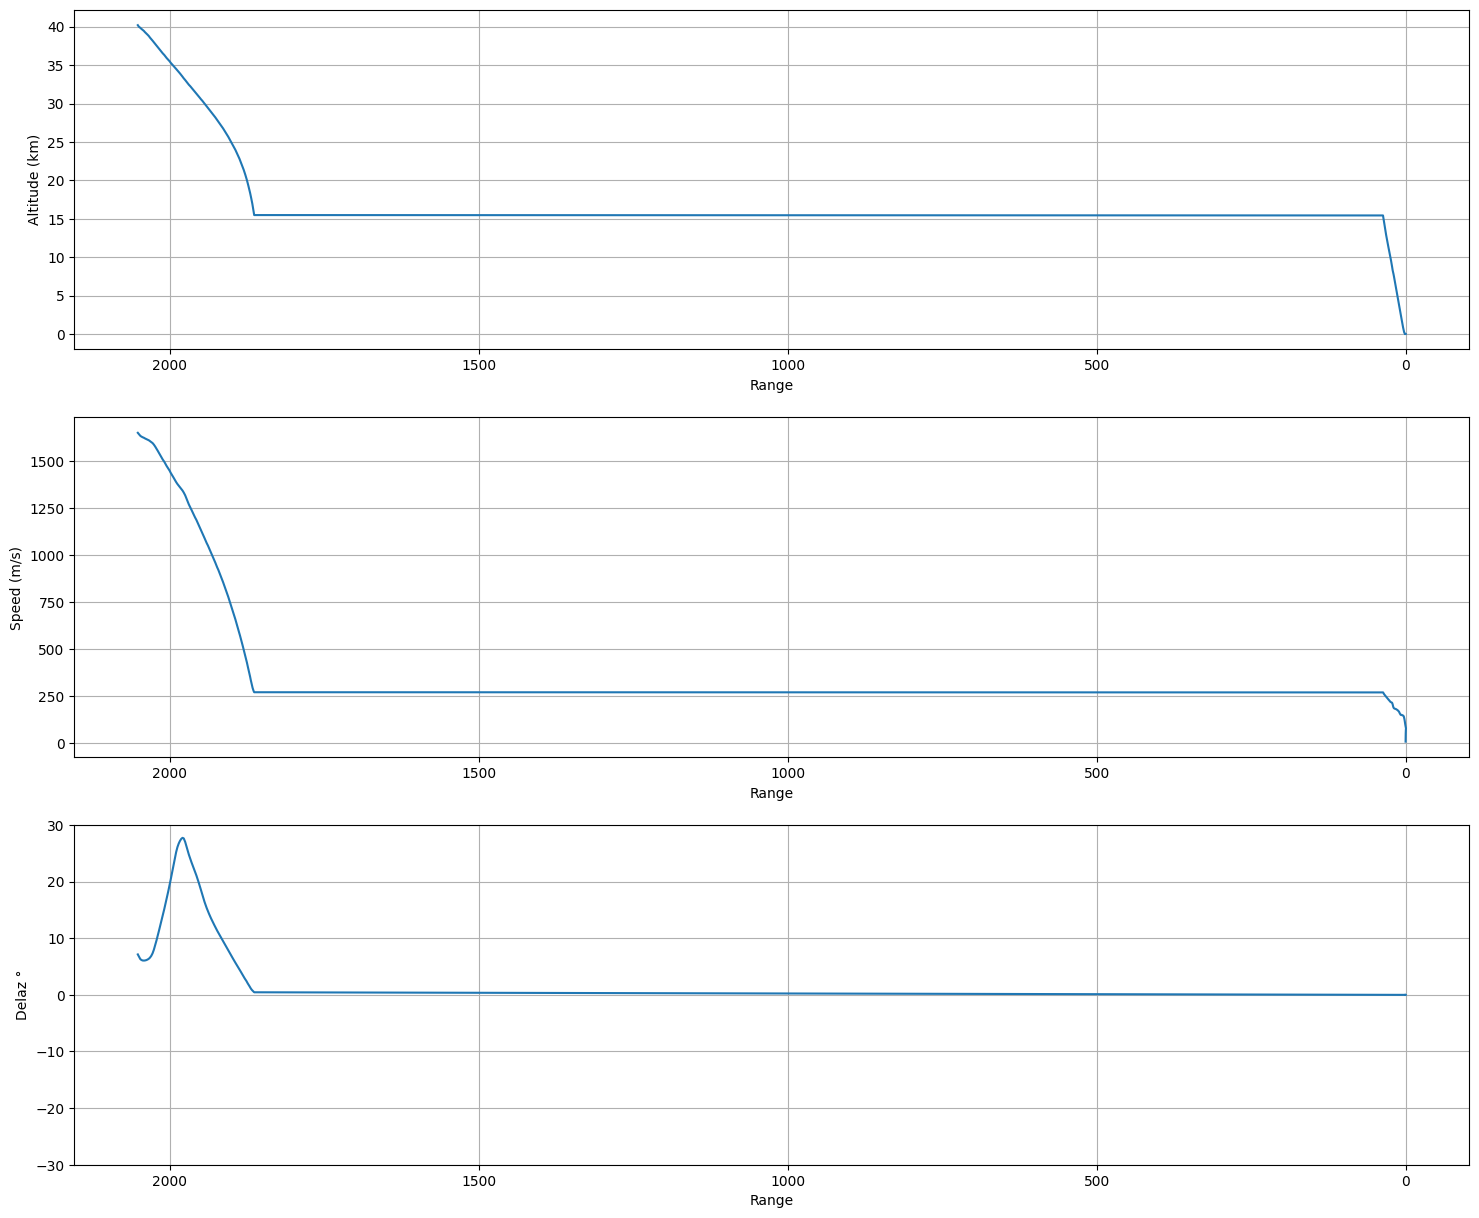

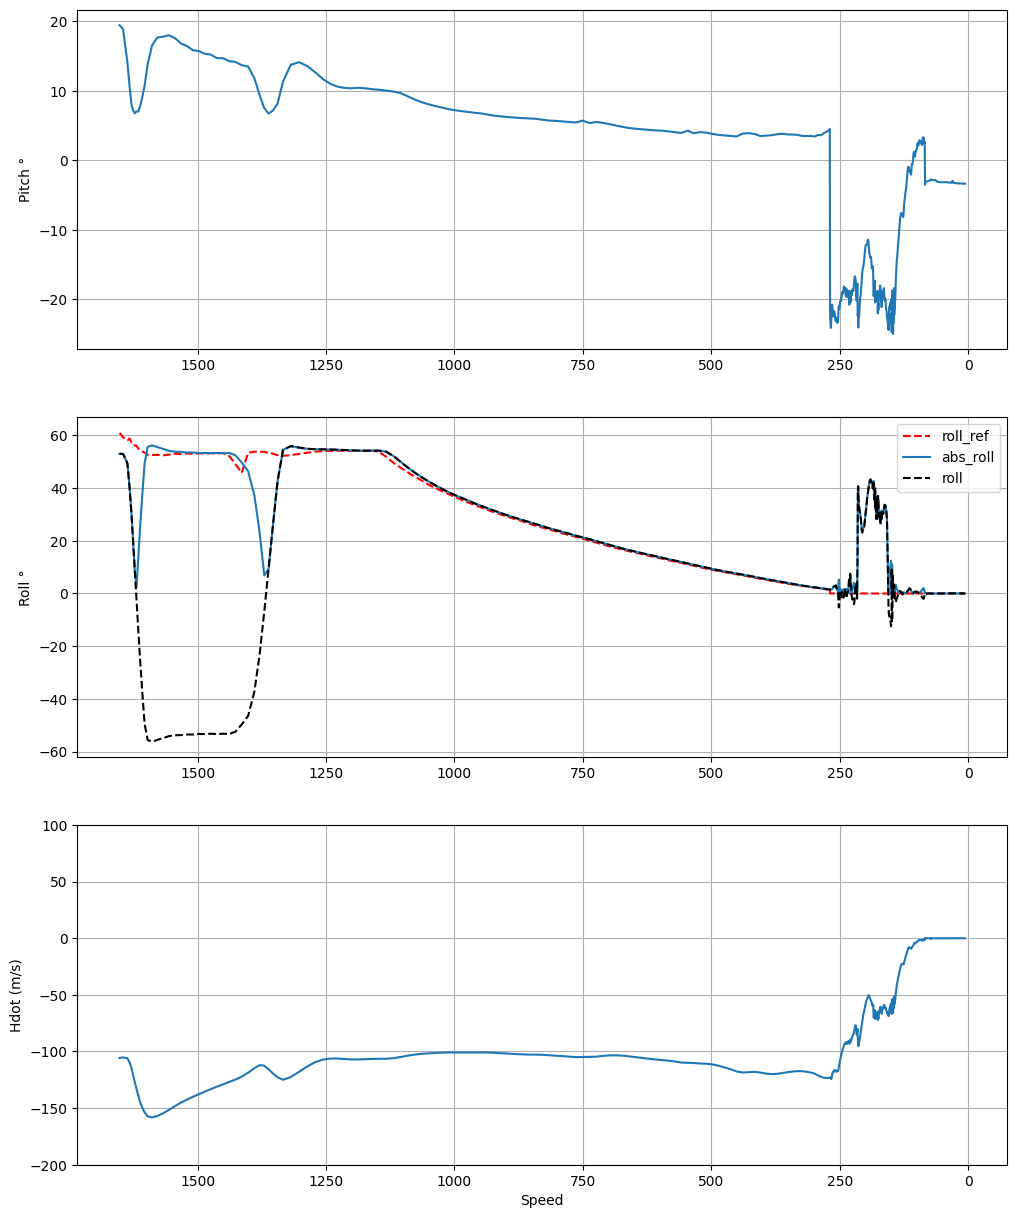

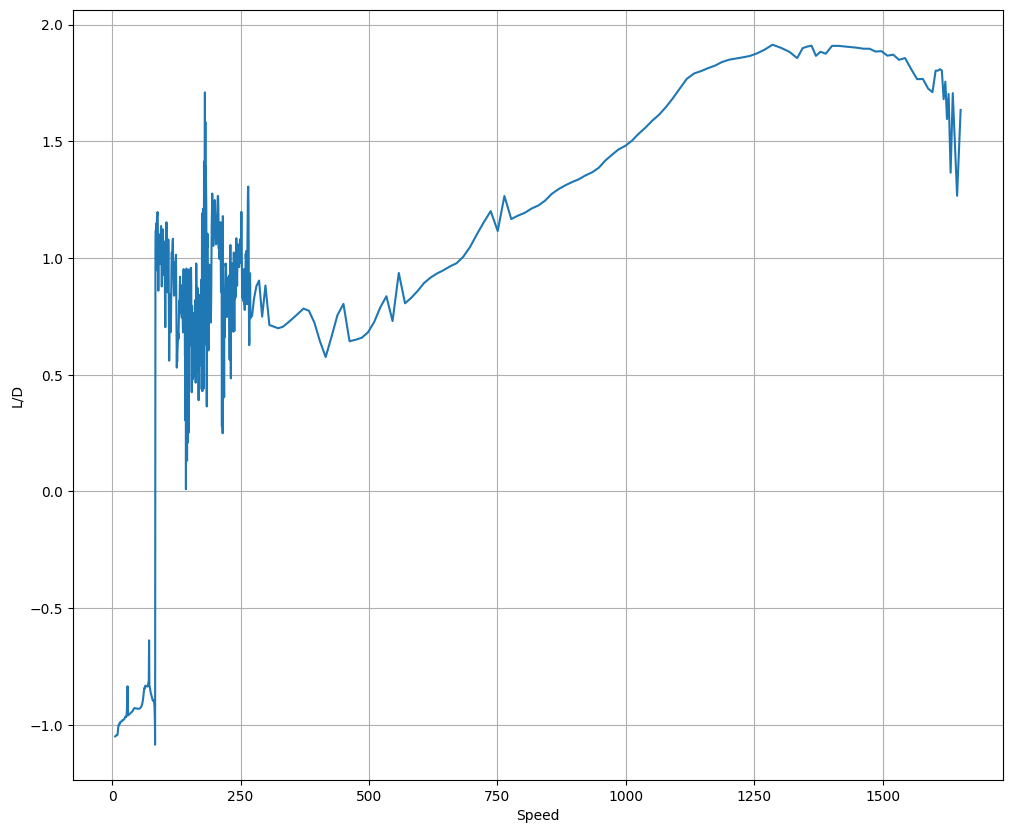

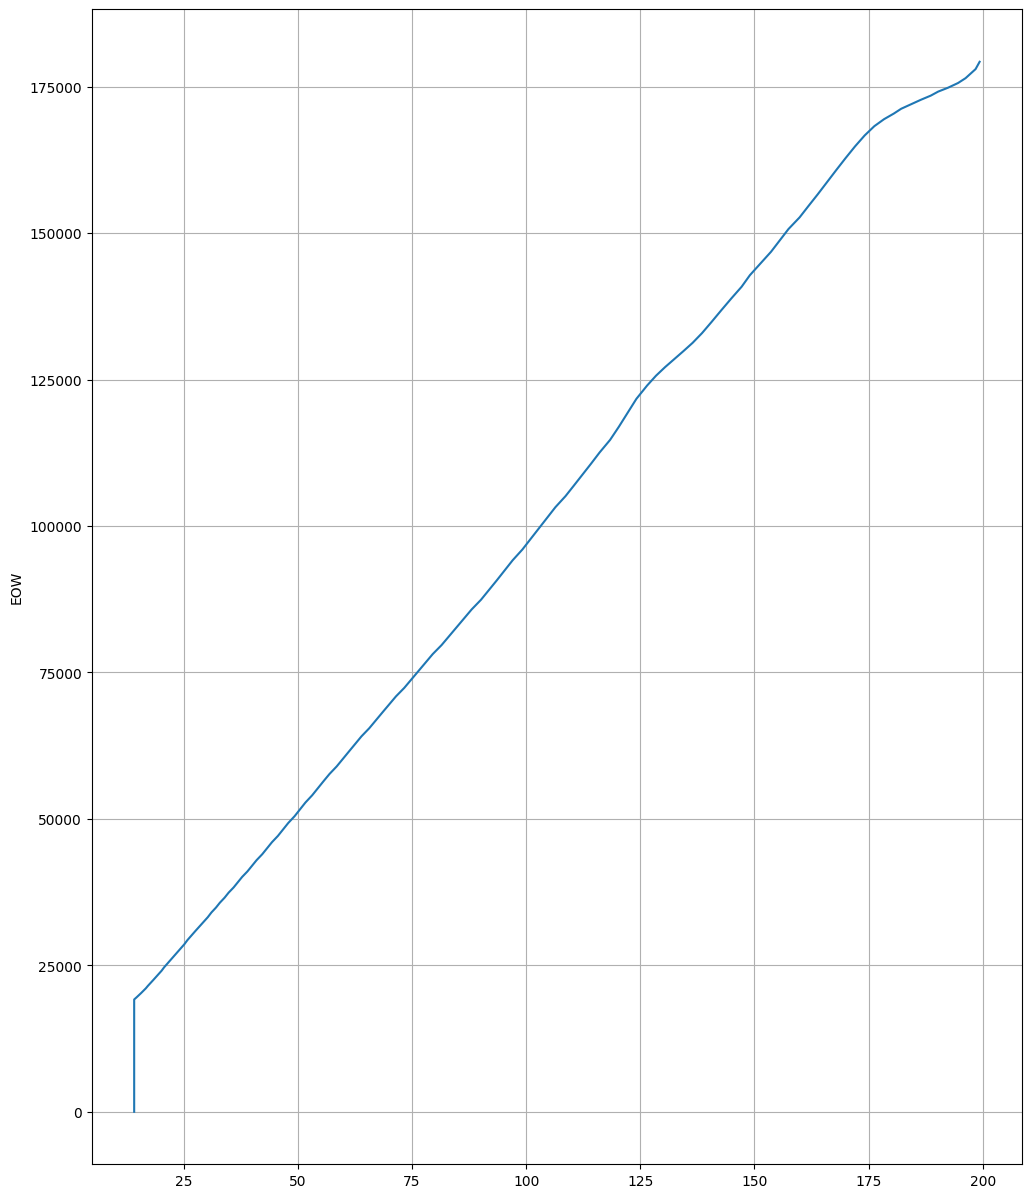

In [8]:
def taem_plots(data):
    
    

    
    fig_1, ax_1 = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

    plt_ = ax_1[0]
    plt_.plot(data['time'], data['alt'])

    plt_.set_xlabel('Time')
    plt_.set_ylabel('Altitude (km)')
    plt_.grid()

    plt_ = ax_1[1]
    plt_.plot(data['time'], data['speed'])

    plt_.set_xlabel('Time')
    plt_.set_ylabel('Speed (m/s)')
    plt_.grid()

    fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(18, 15))

    plt_ = ax[0]
    plt_.plot(data['range'], data['alt'])

    plt_.set_xlabel('Range')
    plt_.set_ylabel('Altitude (km)')
    plt_.grid()

    plt_.invert_xaxis()

    plt_ = ax[1]
    plt_.plot(data['range'], data['speed'])

    plt_.set_xlabel('Range')
    plt_.set_ylabel('Speed (m/s)')
    plt_.grid()

    plt_.invert_xaxis()


    plt_ = ax[2]

    plt_.plot(data['range'], data['az_err'])


    plt.ylim((-30,30))    
    plt_.set_xlabel('Range')
    plt_.set_ylabel('Delaz °')
    plt_.grid()

    plt_.invert_xaxis()

    
    fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(18, 15))

    plt_ = ax[0]
    plt_.plot(data['range'], data['alt'])

    plt_.set_xlabel('Range')
    plt_.set_ylabel('Altitude (km)')
    plt_.grid()

    plt_.invert_xaxis()

    plt_ = ax[1]
    plt_.plot(data['range'], data['speed'])

    plt_.set_xlabel('Range')
    plt_.set_ylabel('Speed (m/s)')
    plt_.grid()

    plt_.invert_xaxis()


    plt_ = ax[2]

    plt_.plot(data['range'], data['az_err'])


    plt.ylim((-30,30))    
    plt_.set_xlabel('Range')
    plt_.set_ylabel('Delaz °')
    plt_.grid()

    plt_.invert_xaxis()



    fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))

    plt_ = ax[0]
    plt_.plot(data['speed'], data['pitch'])

    plt.ylim((0,45)) 
    plt_.set_ylabel('Pitch °')
    plt_.grid()


    plt_.invert_xaxis()

    plt_ = ax[1]

    plt_.plot(data['speed'], abs(data['roll_ref']),'--', color='r',label='roll_ref')
    plt_.plot(data['speed'], abs(data['roll']),label='abs_roll')
    plt_.plot(data['speed'], data['roll'], '--', color='k', label='roll')


    plt.ylim((-90,90))    
    plt_.set_ylabel('Roll °')
    plt_.legend()
    plt_.grid()


    plt_.invert_xaxis()

    plt_ = ax[2]
    plt_.plot(data['speed'], data['hdot'])

    plt.ylim((-200,100))    
    plt_.set_xlabel('Speed')
    plt_.set_ylabel('Hdot (m/s)')
    plt_.grid()

    plt_.invert_xaxis()

    
    plt.figure(figsize=(12, 10))


    plt.plot(data['speed'], data['l_d'])

    plt.xlabel('Speed')
    plt.ylabel('L/D')
    plt.grid()
    
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 15))

    plt_ = ax
    plt_.plot(data['tgt_range'], data['eow'])

    plt_.set_ylabel('EOW')
    plt_.grid()



taem_plots(data_taem)

Text(0, 0.5, 'EOW')

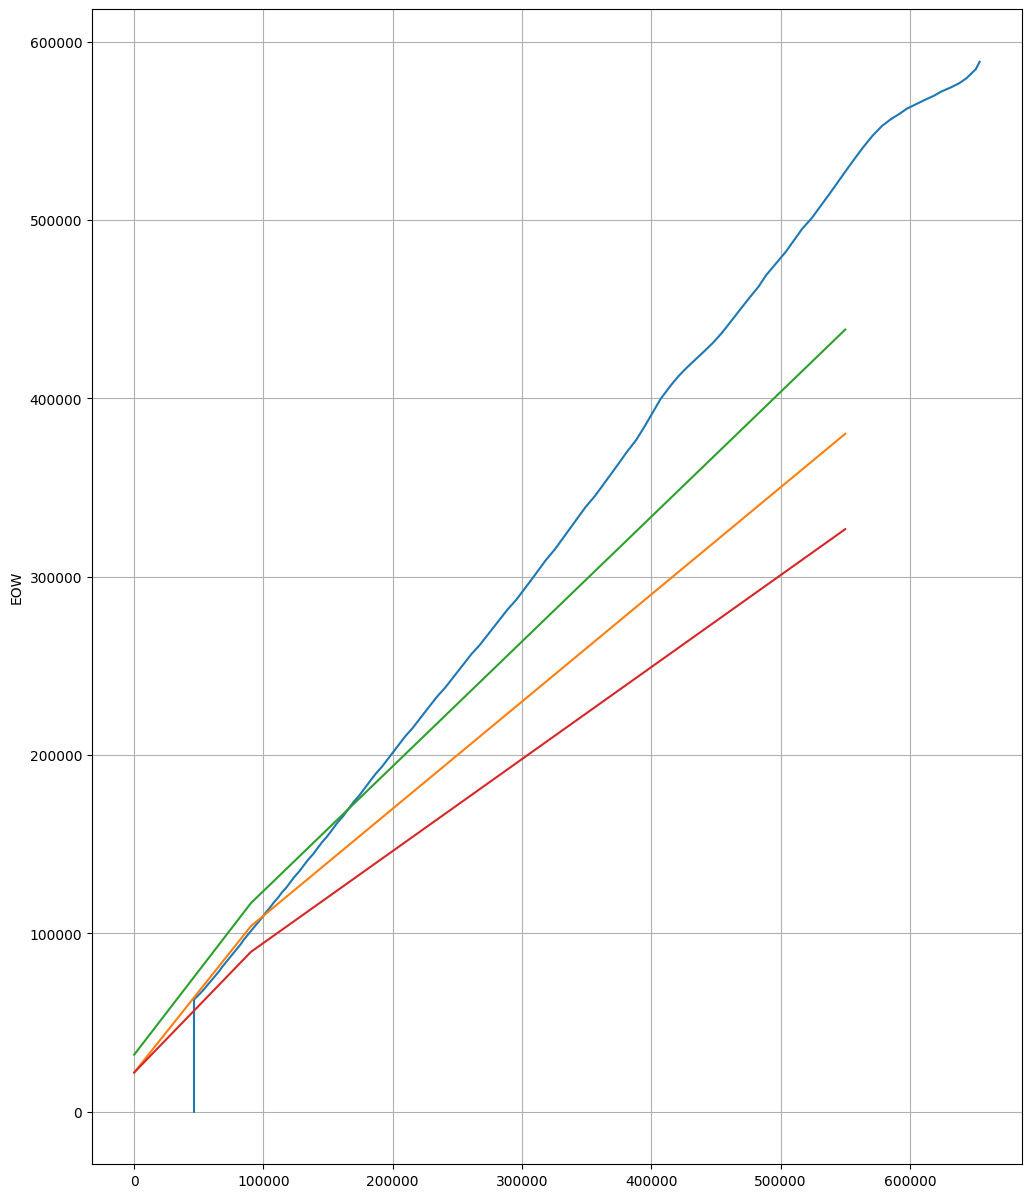

In [63]:

def en2_(drpred):
    
    r2max = 115000
    eshfmx = 100000
    
    #en_c1 = [12975, 15000]
    #en_c2 = [0.5625, 0.54]
    
    en_c1 = [49855, 22000]
    en_c2 = [0.6005, 0.91]
    
    eow_spt = 90000
    
    iel = 0
    if (drpred < eow_spt):
        iel = 1
    
    en = en_c1[iel] + drpred * en_c2[iel] 
    
    return en


def es2_(drpred):
    
    #es1 = 15000
    #edrs = 0.69946182
    
    es_c1 = [53848.4, 32000]
    es_c2 = [0.69946182, 0.94222182]

    eow_spt = 90000

    iel = 0
    if (drpred < eow_spt):
        iel = 1
    
    es = es_c1[iel] + drpred * es_c2[iel] 
    
    
    return es

def emep2_(drpred):
    
    #emep_c1 = [9262.5, 15000]
    #emep_c2 = [0.44375, 0.38]
    
    emep_c1 = [43100.5, 22000]
    emep_c2 = [0.51554944, 0.75]
    
    eow_spt = 90000
    
    iel = 0
    if (drpred < eow_spt):
        iel = 1
    
    emep = emep_c1[iel] + drpred * emep_c2[iel] 
    
    return emep

drpred = np.linspace(0, 550000, 1000)

en2 = [en2_(r) for r in drpred]
emep2 = [emep2_(r) for r in drpred]
es2 = [es2_(r) for r in drpred]


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 15))

plt_ = ax
plt_.plot(data_taem['tgt_range'] * 3280.84, data_taem['eow'] * 3.284)

plt_.set_ylabel('EOW')
plt_.grid()

plt_.plot(drpred, en2)
plt_.plot(drpred, es2)
plt_.plot(drpred, emep2)

Text(0, 0.5, 'alt prof')

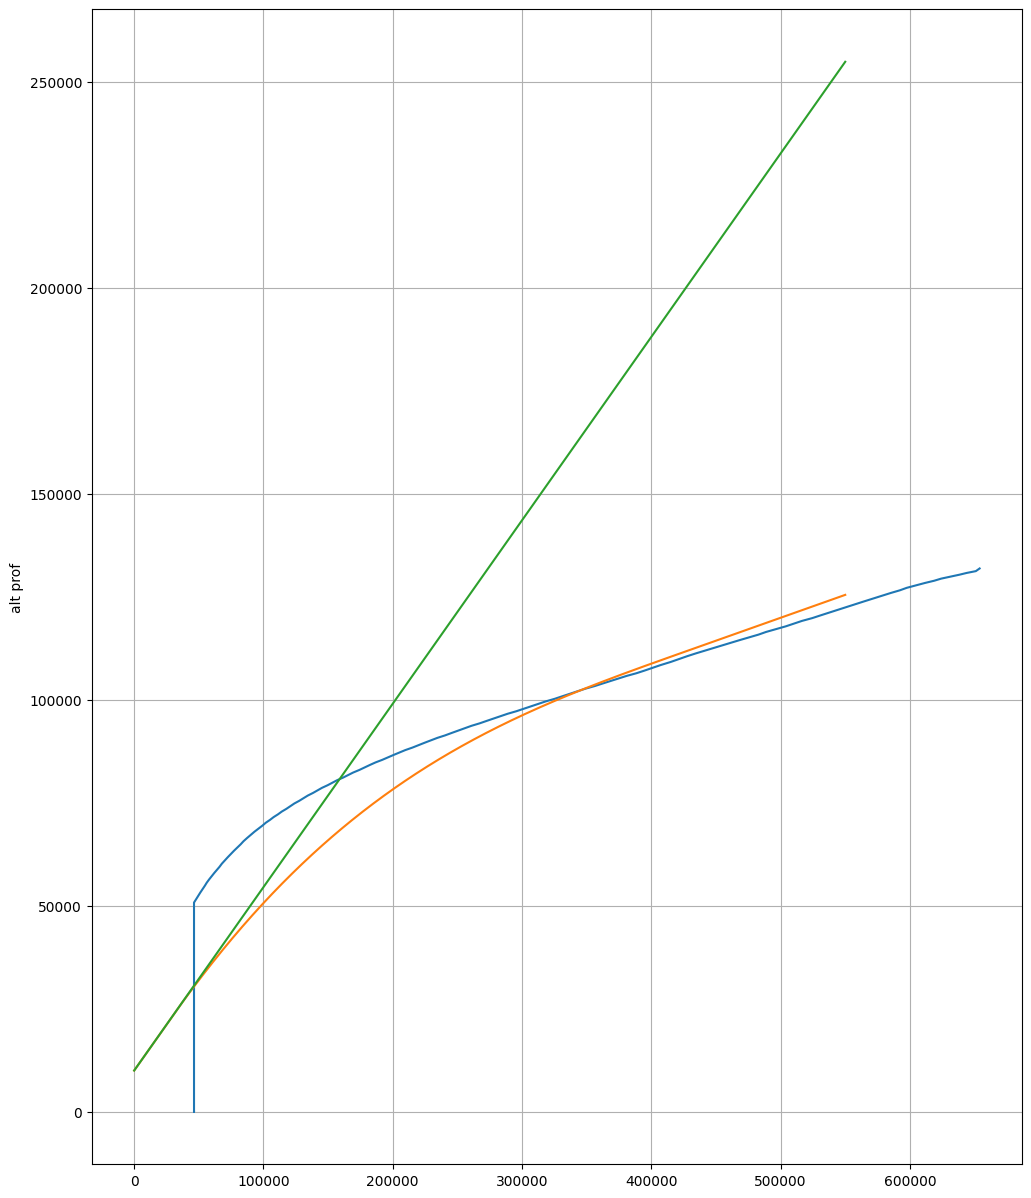

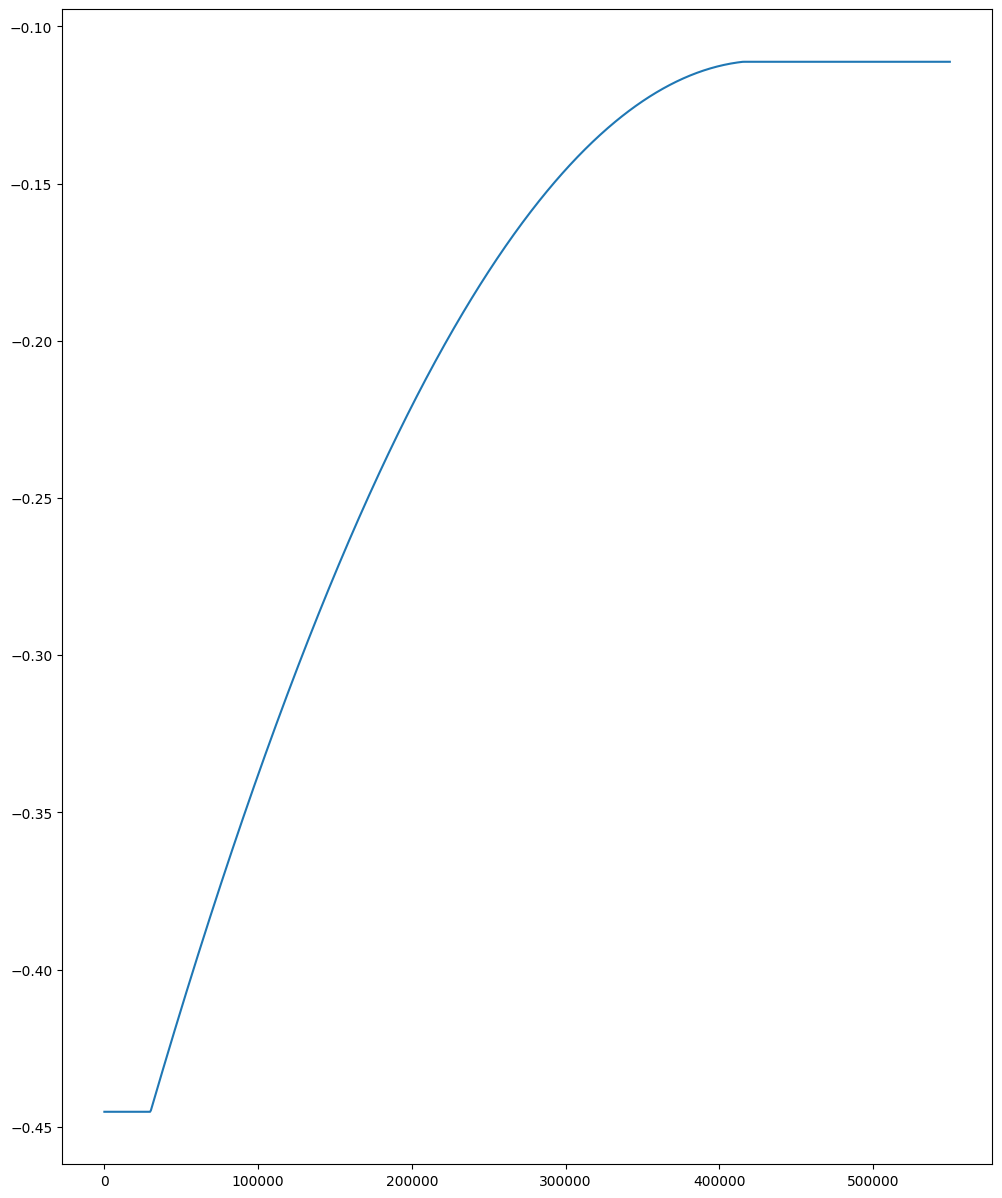

In [66]:
def ogs_(drpred):
    hali = 10018
    tggs = 0.44522869
    return hali + tggs * drpred

def midval(a, b, c):

    maxx = max(a, b)
    maxx = max(maxx, c)

    minn = min(a, b)
    minn = min(minn, c)

    return a + b + c - maxx - minn

def href_(drpred):

    tggs = 0.44522869
    pbgc = 0.1112666
    hali = 10018
    pbrc_fit = [256527.82, 1320895.49875, 0.3249196962]
    pbhc_fit = [90000, 170534.500266, 0.3249196962]

    pbrc = [0, 0]
    pbhc = [0, 0]

    pbrc[0] = 30000
    pbhc[0] = hali + pbrc[0] * tggs

    pbrc[1] = pbrc_fit[0] + pbrc_fit[1] * (tggs - pbrc_fit[2])
    pbhc[1] = pbhc_fit[0] + pbhc_fit[1] * (tggs - pbhc_fit[2])


    dpbrc = pbrc[1] -  pbrc[0]
    dpbhc = pbhc[1] -  pbhc[0]

    chi = dpbhc / (dpbrc**2) - tggs / dpbrc
    th = (pbgc - tggs) / (2*dpbrc)

    cubic_c3 = 3*chi - 2*th
    cubic_c4 = 2*(th - chi) / dpbrc
    
    if (drpred > pbrc[1]):
        return pbhc[1] + pbgc * (drpred - pbrc[1])
    elif (drpred < pbrc[0]):
        return hali + tggs * drpred
    else:
        drpred_1 = drpred -  pbrc[0]
        return pbhc[0] + tggs * drpred_1 + (cubic_c3 + drpred_1 * cubic_c4) * drpred_1**2

def dhdrrf_(drpred):

    tggs = 0.44522869
    pbgc = 0.1112666
    hali = 10018
    pbrc_fit = [256527.82, 1320895.49875, 0.3249196962]
    pbhc_fit = [90000, 170534.500266, 0.3249196962]

    pbrc = [0, 0]
    pbhc = [0, 0]

    pbrc[0] = 30000
    pbhc[0] = hali + pbrc[0] * tggs

    pbrc[1] = pbrc_fit[0] + pbrc_fit[1] * (tggs - pbrc_fit[2])
    pbhc[1] = pbhc_fit[0] + pbhc_fit[1] * (tggs - pbhc_fit[2])


    dpbrc = pbrc[1] -  pbrc[0]
    dpbhc = pbhc[1] -  pbhc[0]

    chi = dpbhc / (dpbrc**2) - tggs / dpbrc
    th = (pbgc - tggs) / (2*dpbrc)

    cubic_c3 = 3*chi - 2*th
    cubic_c4 = 2*(th - chi) / dpbrc
    
    if (drpred > pbrc[1]):
        return -pbgc
    elif (drpred < pbrc[0]):
        return -tggs
    else:
        drpred_1 = drpred -  pbrc[0]

        fpa = tggs + drpred_1 * (2 * cubic_c3 + 3 * cubic_c4 * drpred_1)
        
        return -midval(fpa, tggs, pbgc)

drpred = np.linspace(0, 550000, 1000)


ogs = [ogs_(r) for r in drpred]
href = [href_(r) for r in drpred]
dhdrrf = [dhdrrf_(r) for r in drpred]


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 15))

plt_ = ax
plt_.plot(data_taem['tgt_range'] * 3280.84, data_taem['alt'] * 3280.84)

plt_.set_ylabel('alt prof')
plt_.grid()

plt_.plot(drpred, href)
plt_.plot(drpred, ogs)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 15))

plt_ = ax
plt_.plot(drpred, dhdrrf)